# Airline Delay Analysis

#### This coursework uses the U.S. Department of Transportation’s Airline On-Time Statistics and Delay Causes dataset, which provides monthly records on domestic flights operated by major U.S. carriers. The dataset includes counts of on-time, delayed, canceled, and diverted flights, along with detailed delay-cause categories such as Air Carrier, Extreme Weather, NAS (National Aviation System), Late-Arriving Aircraft, and Security.

### Using this dataset of over 400,000 flight records (2003-2025), the coursework develops a full machine learning pipeline for analyzing and predicting airline delays. The goal is to perform exploratory data analysis, engineer meaningful features, train regression and classification models, and deploy an interactive Streamlit application for real-time delay predictions. The project also aims to extract business insights that airlines and airports can use to improve operational efficiency and reduce delays.

## Student ID: 00016395



______________________________________________________________________________________________________________________________________________________________

# Import required libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset, identify shape and overview

In [25]:
df = pd.read_csv('data/Airline_Delay_Cause.csv')
print("Dataset loaded sucessfully!!!")
print(f"Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns")
print("=" * 40)
print("Dataset First 10 rows: ")
df.head(10)

Dataset loaded sucessfully!!!
Dataset shape: 409612 rows x 21 columns
Dataset First 10 rows: 


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,7,YV,Mesa Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",18.0,2.0,1.43,0.00,...,0.0,0.00,0.0,0.0,44.0,32.0,0.0,12.0,0.0,0.0
1,2025,7,YV,Mesa Airlines Inc.,CHS,"Charleston, SC: Charleston AFB/International",48.0,16.0,4.06,3.15,...,0.0,3.30,2.0,0.0,1282.0,331.0,438.0,259.0,0.0,254.0
2,2025,7,YV,Mesa Airlines Inc.,CLE,"Cleveland, OH: Cleveland-Hopkins International",65.0,10.0,3.53,1.00,...,0.0,2.43,2.0,0.0,735.0,151.0,172.0,139.0,0.0,273.0
3,2025,7,YV,Mesa Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",134.0,31.0,13.19,2.43,...,0.0,4.74,8.0,0.0,2264.0,798.0,303.0,702.0,0.0,461.0
4,2025,7,YV,Mesa Airlines Inc.,CMH,"Columbus, OH: John Glenn Columbus International",61.0,12.0,6.44,0.28,...,0.0,1.69,0.0,0.0,630.0,211.0,17.0,123.0,0.0,279.0
5,2025,7,YV,Mesa Airlines Inc.,COS,"Colorado Springs, CO: City of Colorado Springs...",31.0,5.0,1.84,0.00,...,0.0,2.01,0.0,0.0,668.0,154.0,0.0,67.0,0.0,447.0
6,2025,7,YV,Mesa Airlines Inc.,CRP,"Corpus Christi, TX: Corpus Christi International",19.0,4.0,0.71,0.30,...,0.0,2.29,1.0,0.0,823.0,45.0,6.0,14.0,0.0,758.0
7,2025,7,YV,Mesa Airlines Inc.,CVG,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",75.0,14.0,7.64,1.00,...,0.0,1.79,0.0,0.0,722.0,485.0,24.0,81.0,0.0,132.0
8,2025,7,YV,Mesa Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",97.0,23.0,8.09,0.73,...,0.0,9.33,1.0,0.0,2125.0,655.0,65.0,437.0,0.0,968.0
9,2025,7,YV,Mesa Airlines Inc.,DRO,"Durango, CO: Durango La Plata County",31.0,1.0,0.82,0.00,...,0.0,0.00,0.0,0.0,50.0,41.0,0.0,9.0,0.0,0.0


## Data Types and statistics

In [26]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409612 entries, 0 to 409611
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 409612 non-null  int64  
 1   month                409612 non-null  int64  
 2   carrier              409612 non-null  object 
 3   carrier_name         409612 non-null  object 
 4   airport              409612 non-null  object 
 5   airport_name         409612 non-null  object 
 6   arr_flights          408952 non-null  float64
 7   arr_del15            408656 non-null  float64
 8   carrier_ct           408952 non-null  float64
 9   weather_ct           408952 non-null  float64
 10  nas_ct               408952 non-null  float64
 11  security_ct          408952 non-null  float64
 12  late_aircraft_ct     408952 non-null  float64
 13  arr_cancelled        408952 non-null  float64
 14  arr_diverted         408952 non-null  float64
 15  arr_delay        

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,409612.000000,409612.000000,408952.000000,408656.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000
mean,2014.715218,6.468014,361.155219,69.864434,20.621496,2.536097,22.230743,0.171458,24.254104,6.744285,0.840910,4218.975002,1324.919900,228.574708,1034.045357,7.148976,1624.278981
std,6.616430,3.442544,993.827182,194.585817,48.715269,9.662785,79.393254,0.821340,74.913717,34.782892,3.834991,12976.256753,3905.756663,909.755462,4362.757658,39.156889,5246.925768
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2009.000000,3.000000,55.000000,8.000000,2.790000,0.000000,1.410000,0.000000,1.540000,0.000000,0.000000,408.000000,134.000000,0.000000,49.000000,0.000000,77.000000
50%,2015.000000,6.000000,112.000000,21.000000,7.500000,0.530000,4.910000,0.000000,5.550000,1.000000,0.000000,1150.000000,411.000000,23.000000,184.000000,0.000000,347.000000
75%,2021.000000,9.000000,254.000000,52.000000,18.660000,2.000000,13.980000,0.000000,16.270000,4.000000,1.000000,2999.000000,1082.000000,158.000000,558.000000,0.000000,1104.000000
max,2025.000000,12.000000,21977.000000,6377.000000,1886.580000,717.940000,4091.270000,80.560000,2588.130000,4951.000000,256.000000,648300.000000,321792.000000,64550.000000,238440.000000,3760.000000,279153.000000


# 2.Exploratory Data Analysis

### 2.1.Checking Missing or NA values

In [27]:
null_values = df.isnull().sum()
print("Missing/NA values: ")
print(null_values)


Missing/NA values: 
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            660
arr_del15              956
carrier_ct             660
weather_ct             660
nas_ct                 660
security_ct            660
late_aircraft_ct       660
arr_cancelled          660
arr_diverted           660
arr_delay              660
carrier_delay          660
weather_delay          660
nas_delay              660
security_delay         660
late_aircraft_delay    660
dtype: int64


### 2.2.Distribution of arrival delay

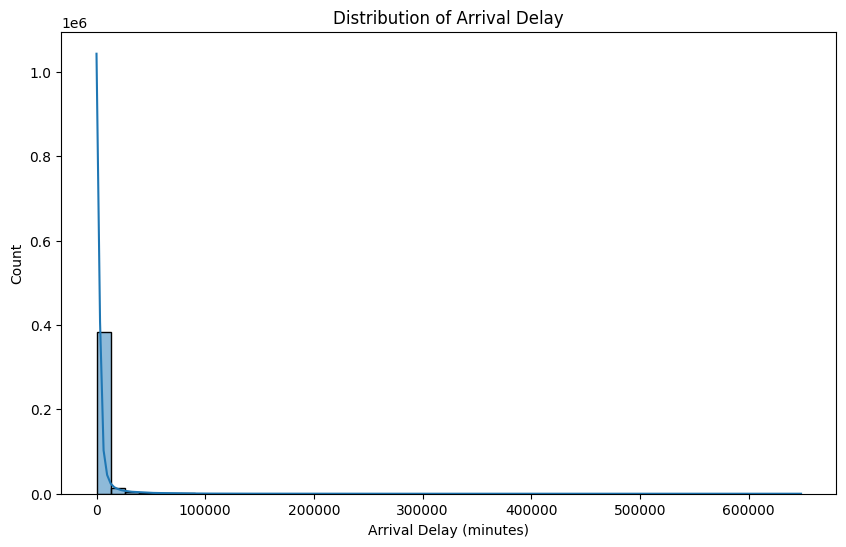

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['arr_delay'], bins=50, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.show()

### 2.3.Correlation Matrix

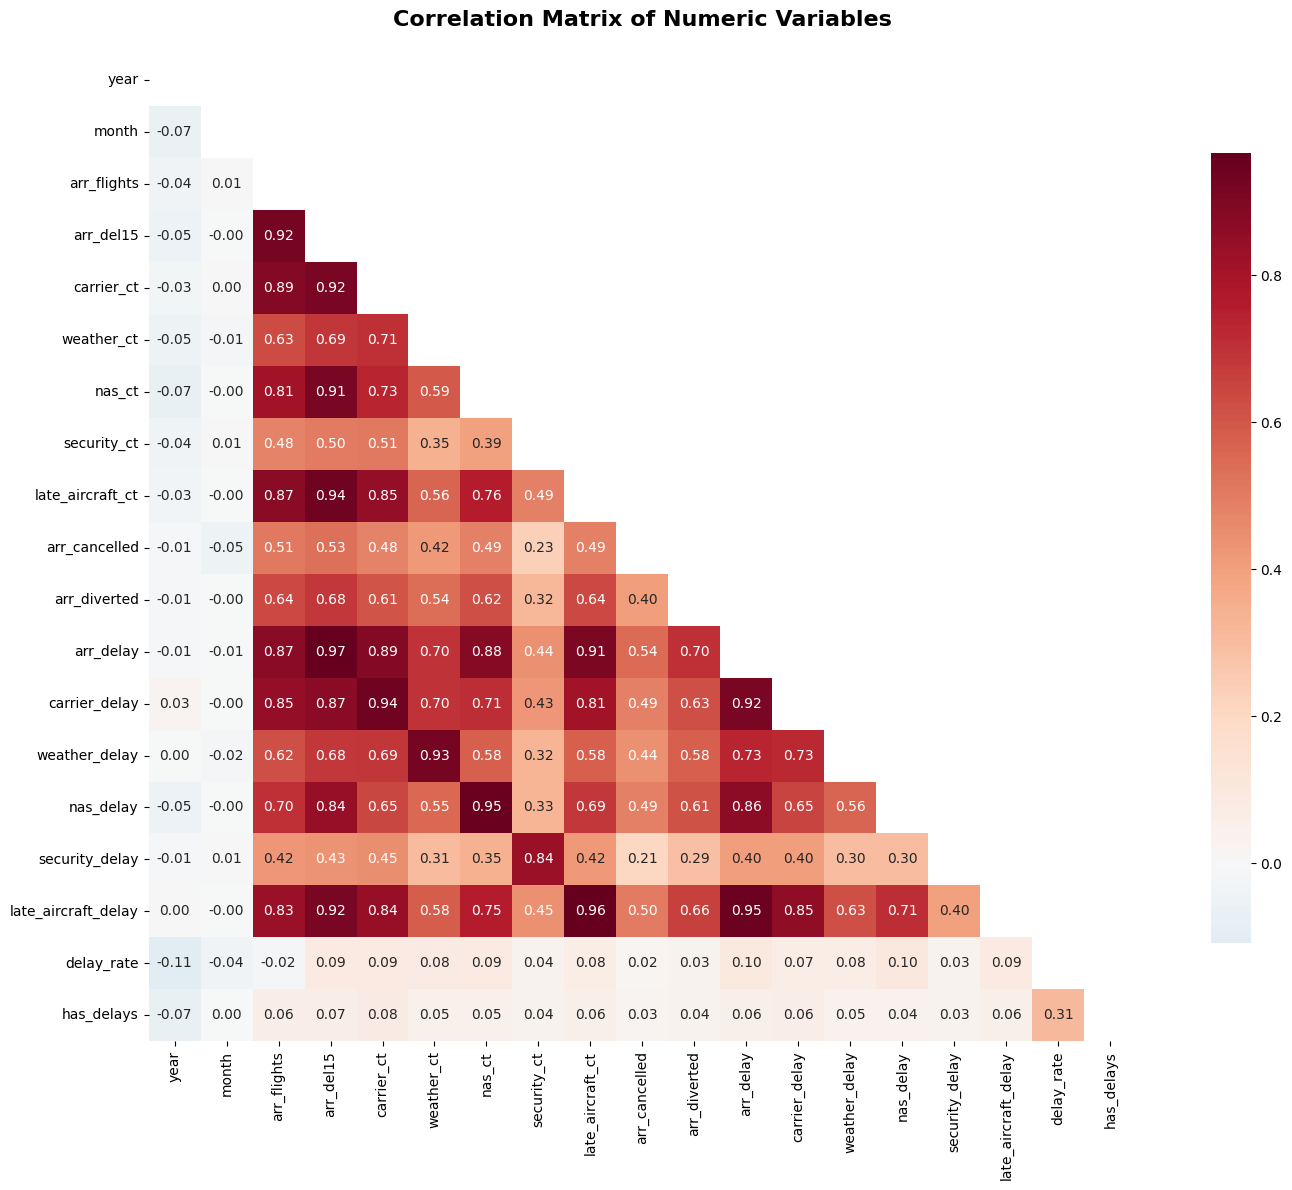

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = df[numeric_cols]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 2.4.Removing missing values from dataset

In [30]:
df_clean = df.dropna()
df_clean.isnull().sum()


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

## 2.5.Comprehensive data analysis with cleaned data

For further usage following two indicators should be created:

In [35]:
df['delay_rate'] = (df['arr_del15'] / df['arr_flights']) * 100  
df['has_delays'] = (df['arr_del15'] > 0).astype(int)

print(f"Indicators created:")
print(f"delay_rate: Percentage of flights delayed 15+ minutes")
print(f"has_delays: Binary indicator (0=no delays, 1=some delays)")

Indicators created:
delay_rate: Percentage of flights delayed 15+ minutes
has_delays: Binary indicator (0=no delays, 1=some delays)


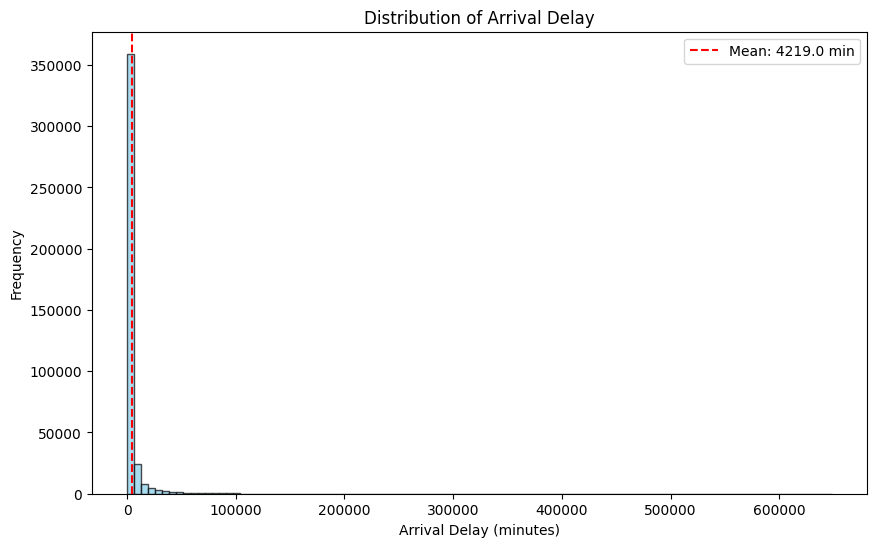

In [36]:
arr_delay = df['arr_delay']
mean_arr_delay = arr_delay.mean()

plt.figure(figsize=(10, 6))
plt.hist(arr_delay, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_arr_delay, color='red', linestyle='--', 
            label=f'Mean: {mean_arr_delay:.1f} min')
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

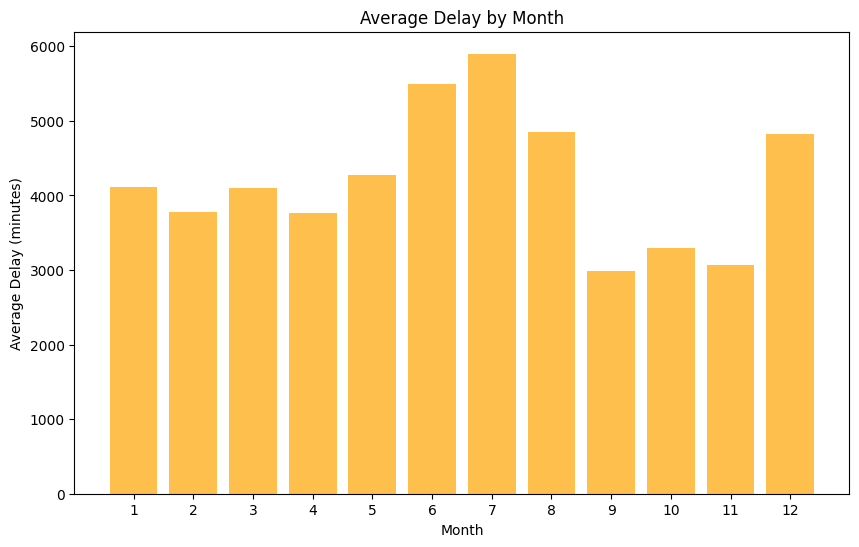

In [32]:
monthly_delay = df.groupby('month')['arr_delay'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_delay.index, monthly_delay.values, color='orange', alpha=0.7)
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13))
plt.show()

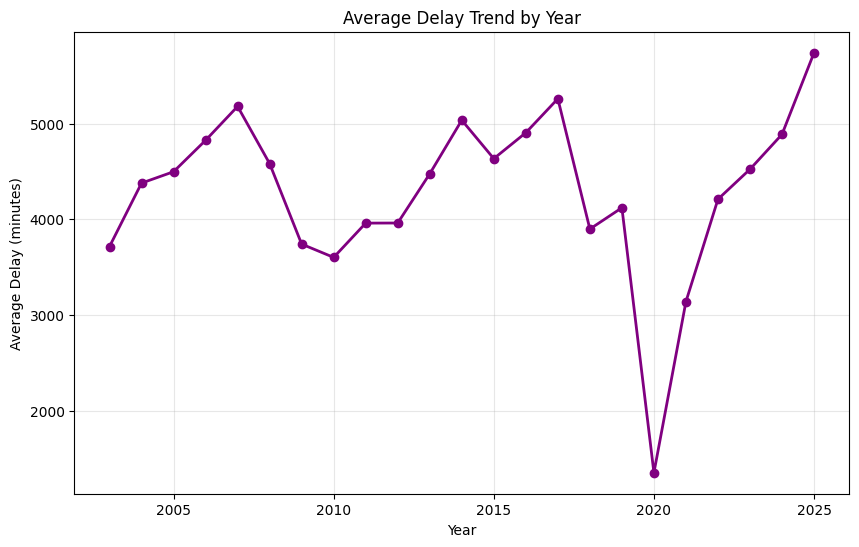

In [33]:
yearly_delay = df.groupby('year')['arr_delay'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_delay.index, yearly_delay.values, marker='o',
         linewidth=2, color='purple')
plt.title('Average Delay Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)
plt.show()


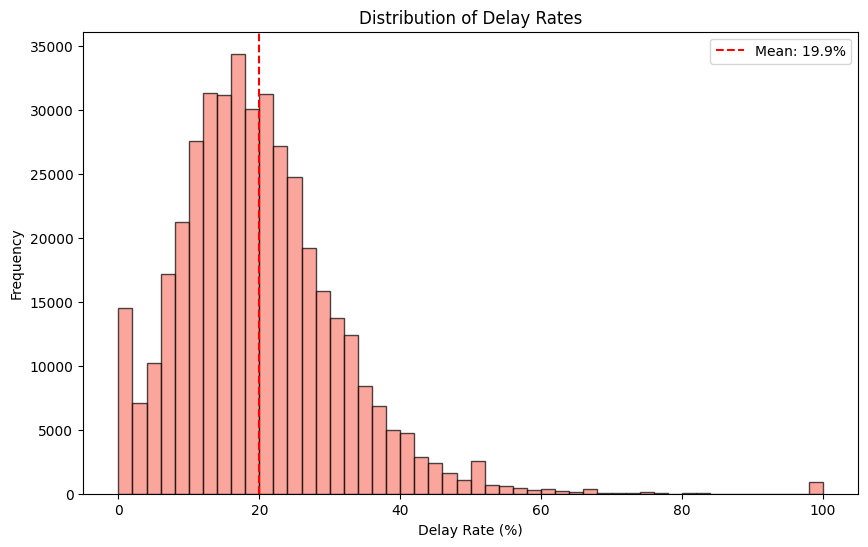

In [37]:
delay_rate = df['delay_rate'].dropna()
mean_delay_rate = delay_rate.mean()

plt.figure(figsize=(10, 6))
plt.hist(delay_rate, bins=50, alpha=0.7, color='salmon', edgecolor='black')
plt.axvline(mean_delay_rate, color='red', linestyle='--',
            label=f'Mean: {mean_delay_rate:.1f}%')
plt.title('Distribution of Delay Rates')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

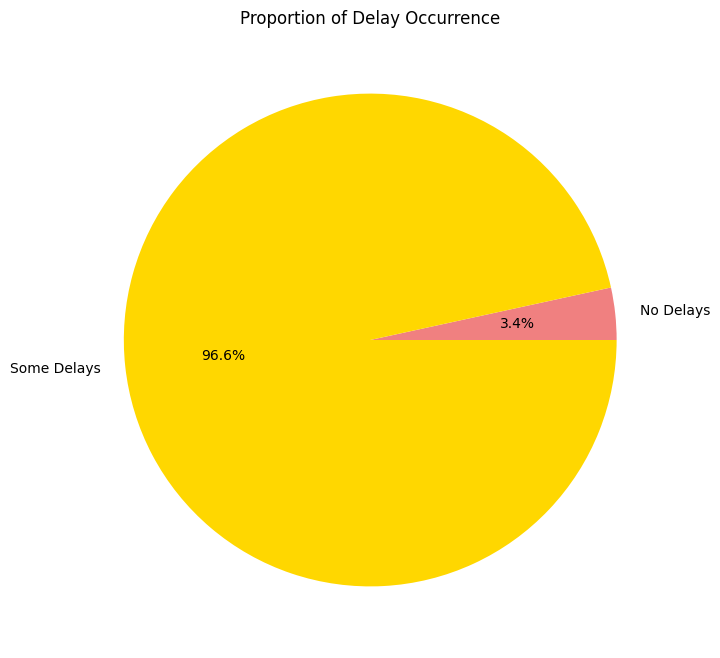

In [38]:
delay_counts = df['has_delays'].value_counts().sort_index()
labels = ['No Delays', 'Some Delays']

plt.figure(figsize=(8, 8))
plt.pie(delay_counts.values, labels=labels, autopct='%1.1f%%',
        colors=['lightcoral', 'gold'])
plt.title('Proportion of Delay Occurrence')
plt.show()


### Overal Stats:

In [39]:
print(f"Average arrival delay: {mean_arr_delay:.2f} minutes")
print(f"Median arrival delay: {arr_delay.median():.2f} minutes")
print(f"Standard deviation: {arr_delay.std():.2f} minutes")
print(f"Average delay rate: {mean_delay_rate:.2f}%")
print(f"Records with delays: {delay_counts.get(1, 0):,} "
      f"({df['has_delays'].mean() * 100:.1f}%)")
print(f"Total flights analyzed: {df['arr_flights'].sum():,.0f}")
print(f"Most delayed month: {monthly_delay.idxmax()} "
      f"(avg: {monthly_delay.max():.1f} min)")
print(f"Least delayed month: {monthly_delay.idxmin()} "
      f"(avg: {monthly_delay.min():.1f} min)")

Average arrival delay: 4218.98 minutes
Median arrival delay: 1150.00 minutes
Standard deviation: 12976.26 minutes
Average delay rate: 19.92%
Records with delays: 395,607 (96.6%)
Total flights analyzed: 147,695,149
Most delayed month: 7 (avg: 5901.0 min)
Least delayed month: 9 (avg: 2983.3 min)


# Data Prepossening 
## Removing NaN/missing values

In [19]:
df_clean = df_clean.drop(columns=[
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'
])

In [20]:
df_encoded = pd.get_dummies(df_clean, columns=['carrier'], drop_first=True)

In [21]:
df_encoded['arr_delay_log'] = np.log1p(df_encoded['arr_delay'])

In [24]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('arr_delay')      
numeric_cols.remove('arr_delay_log')

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [25]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['arr_delay', 'arr_del15', 'arr_delay_log'])
y_reg = df_encoded['arr_delay_log'] 

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

y_clf = df_encoded['arr_del15']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)
